In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
import random
import json
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ActivationFunctions import *
from ModelSelection import *
from NeuralNetwork import *
from MyUtils import *

In [2]:
csv_bak = '..\\data\\GS_datas\\test_1.csv'
top_bak = '..\\data\\GS_datas\\test_1.json'

In [3]:
tr_df = pd.read_csv('../data/monks_csv/monks_tr_3.csv', index_col=0)
len_training = len(tr_df)
val_df = pd.read_csv('../data/monks_csv/monks_ts_3.csv', index_col=0) # test in realtà ma va be
len_validation = len(val_df)
len_dataset = len_training + len_validation
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,output_1
173,2,1,2,1,3,2,1
91,1,2,2,3,2,2,1
105,1,3,1,2,1,2,0
431,3,3,2,3,4,2,0
389,3,3,1,1,3,2,1


In [4]:
def OHE(df):
    OHE = pd.get_dummies(df, columns=['input_'+str(i) for i in range(1, 7)])
    OHE = OHE.set_axis(['output_1'] + ['input_' + str(i) for i in range(1, len(OHE.columns))], axis=1)
    cols = OHE.columns.tolist()
    cols = cols[1:] + cols[:1]
    OHE = OHE[cols]
    return OHE

In [5]:
tr_df_OHE = OHE(tr_df)
tr_df_OHE.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,output_1
93,False,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False,True,0
16,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,1
17,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False,1
95,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False,True,1
35,True,False,False,False,False,True,True,False,True,False,False,False,True,False,False,True,False,0


In [6]:
val_df_OHE = OHE(val_df)
val_df_OHE.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,output_1
173,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,1
91,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,1
105,True,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,True,0
431,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,0
389,False,False,True,False,False,True,True,False,True,False,False,False,False,True,False,False,True,1


From monk database:

Attribute information:
1. class: 0, 1 
2. a1:    1, 2, 3
3. a2:    1, 2, 3
4. a3:    1, 2
5. a4:    1, 2, 3
6. a5:    1, 2, 3, 4
7. a6:    1, 2
8. Id:    (A unique symbol for each instance)

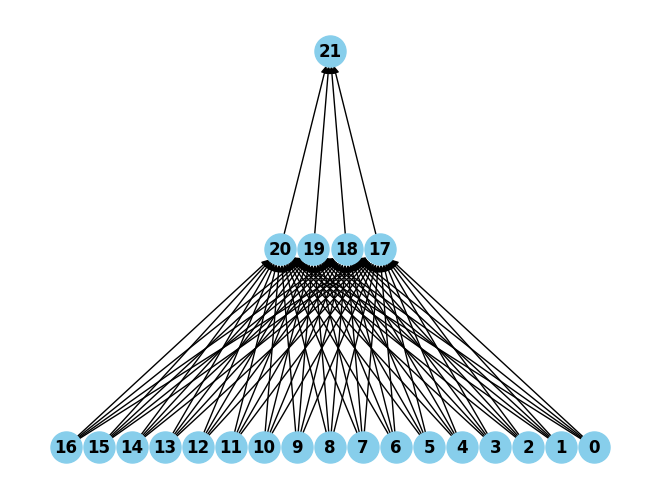

In [7]:
TR_INPUT = len(tr_df_OHE.columns) - 1
TR_OUTPUT = 1
hidden_len = 4
topology = create_stratified_topology([TR_INPUT,hidden_len,TR_OUTPUT], 
                                      [[None,[]]]*TR_INPUT + [['sigmoid', [1]]]*hidden_len + [['sigmoid', [1]]])
NeuralNetwork.display_topology(topology)

In [8]:
NN = NeuralNetwork(topology, -0.75, 0.75, False, RANDOM_STATE)

In [9]:
training_set = tr_df_OHE.values.astype(int)
validation_set = val_df_OHE.values.astype(int)
metrics = [ErrorFunctions.mean_squared_error, ] #ErrorFunctions.mean_euclidean_error, 

batch_size = int(len_training/10)
max_epochs = 100

error_decrease_tolerance = 0.001
patience = 5
min_epochs = 0

lambda_tikhonov = 0.0001
alpha_momentum = 0.9
learning_rate = 0.5/batch_size
# beacause of the momentum is used the learning rate needs to be a little less?!?!?

collect_data = False
collect_data_batch = False # per il momento. molto costoso!!!! False di default
verbose = True


args = [batch_size,    
        max_epochs, 
        error_decrease_tolerance, 
        patience, 
        min_epochs,
        learning_rate, 
        lambda_tikhonov, 
        alpha_momentum, 
        metrics, 
        collect_data, 
        collect_data_batch, 
        verbose]

In [10]:
training_set

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [11]:
validation_set

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [12]:
NN.reset_weights()

In [13]:
param_grid = {
    'batch_size': [int(len_training/10)], 
    'max_epochs': [100], 
    'error_decrease_tolerance': [0.1, 0.001], 
    'patience': [5], 
    'min_epochs': [0],
    'learning_rate': [0.5], 
    'lambda_tikhonov':[0.0001], 
    'alpha_momentum': [0.9], 
    
    'metrics': [[ErrorFunctions.mean_squared_error, ]], 
    'collect_data': [True, False], 
    'collect_data_batch':[False], 
    'verbose':[False],
    
    'topology':[topology]
}

In [14]:
MS = ModelSelection('..\\data\\GS_datas\\test_1.csv')

In [15]:
NN.train_input[2:]

['batch_size',
 'max_epochs',
 'error_decrease_tolerance',
 'patience',
 'min_epochs',
 'learning_rate',
 'lambda_tikhonov',
 'alpha_momentum',
 'metrics',
 'collect_data',
 'collect_data_batch',
 'verbose']

In [16]:
'''stats = MS.train_modelKF(training_set, 
                   [[batch_size, 
                    max_epochs, 
                    error_decrease_tolerance, 
                    patience, 
                    min_epochs,
                    learning_rate, 
                    lambda_tikhonov, 
                    alpha_momentum, 
                    metrics, 
                    collect_data, 
                    collect_data_batch, 
                    verbose,
                    topology]],
                   NN.train_input[2:] + ['topology'],
                   4,
                   '..\\data\\GS_datas\\test_1.csv')'''

"stats = MS.train_modelKF(training_set, \n                   [[batch_size, \n                    max_epochs, \n                    error_decrease_tolerance, \n                    patience, \n                    min_epochs,\n                    learning_rate, \n                    lambda_tikhonov, \n                    alpha_momentum, \n                    metrics, \n                    collect_data, \n                    collect_data_batch, \n                    verbose,\n                    topology]],\n                   NN.train_input[2:] + ['topology'],\n                   4,\n                   '..\\data\\GS_datas\\test_1.csv')"

In [17]:
MS.grid_searchKF(training_set, param_grid, 4, 5)


Training a new model :  [12, 100, 0.1, 5, 0, 0.5, 0.0001, 0.9, [<function mean_squared_error at 0x0000016198DEDB20>], True, False, False]

Training a new model :  [12, 100, 0.1, 5, 0, 0.5, 0.0001, 0.9, [<function mean_squared_error at 0x0000016198DEDB20>], False, False, False]

Training a new model :  [12, 100, 0.001, 5, 0, 0.5, 0.0001, 0.9, [<function mean_squared_error at 0x0000016198DEDB20>], True, False, False]


KeyboardInterrupt: 

In [ ]:
stats = ModelSelection.kf_train(NN, training_set, 4, metrics, args)

KeyboardInterrupt: 

In [ ]:
MS

In [ ]:
for i in stats:
    print(i , stats[i])

min_epochs 0
lambda_tikhonov 0.0001
error_decrease_tolerance 0.001
max_epochs 100
patience 5
learning_rate 0.041666666666666664
alpha_momentum 0.9
minibatch_size 12
training_set_len 92
units_weights [{20: [array([-0.47793132, -0.17993317,  0.62250667, -0.56672329,  0.38686263,
       -0.34457098, -0.40644407,  0.45473673, -0.07985128, -0.41376412,
       -0.695021  , -0.26780704, -0.24977198, -0.1894533 ,  0.09167221,
       -0.13069118, -0.41553042,  0.14168577]), array([-0.47985554, -0.17985956,  0.62011571, -0.56758521,  0.38615326,
       -0.34520082, -0.40597371,  0.45416466, -0.07990534, -0.41524972,
       -0.69414404, -0.27040113, -0.25562947, -0.18449042,  0.09058692,
       -0.12840076, -0.41650818,  0.13841755]), array([-0.50467914, -0.19020967,  0.605297  , -0.57389212,  0.38041601,
       -0.34902067, -0.41476344,  0.44158326, -0.084086  , -0.42347591,
       -0.7085548 , -0.28063212, -0.27774291, -0.18229194,  0.08562939,
       -0.14391346, -0.42003902,  0.13260996]), ar

In [ ]:
print(stats['total_train_time'])

[datetime.timedelta(0), datetime.timedelta(0), datetime.timedelta(0), datetime.timedelta(0)]


In [ ]:
datetime.datetime.now() - datetime.datetime.now()

datetime.timedelta(0)

In [ ]:
tr_predictions = NN.predict_array(training_set[:,:TR_INPUT])
val_predictions = NN.predict_array(validation_set[:,:TR_INPUT])

In [ ]:
pd.options.mode.chained_assignment = None
prediction_col = ['prediction_1']#, 'prediction_2', 'prediction_3']
for col in prediction_col:
    tr_df[prediction_col] = np.array([[1] if x > 0.5 else [0] for x in tr_predictions])
    tr_df[col + '_err'] = (tr_df[col] - tr_df['output_' + col[-1]])**2
    

In [ ]:
tr_df['prediction_1_err'].max()

1

In [ ]:
tr_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,output_1,prediction_1,prediction_1_err
93,3,1,1,3,4,2,0,1,1
16,1,1,2,3,3,2,1,1,0
17,1,2,1,1,3,1,1,1,0
95,3,1,2,2,3,2,1,1,0
35,1,3,1,1,2,1,0,0,0


In [ ]:
val_df[prediction_col] = val_predictions
for col in prediction_col:
    val_df[prediction_col] = np.array([[1] if x > 0.5 else [0] for x in val_predictions])
    val_df[col + '_err'] = (val_df[col] - val_df['output_' + col[-1]])**2
    

In [ ]:
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,output_1,prediction_1,prediction_1_err
173,2,1,2,1,3,2,1,0,1
91,1,2,2,3,2,2,1,1,0
105,1,3,1,2,1,2,0,0,0
431,3,3,2,3,4,2,0,0,0
389,3,3,1,1,3,2,1,0,1


In [ ]:
print('training accuracy =', (tr_df['output_1'] == tr_df['prediction_1']).sum() / len(tr_df))
print('validation accuracy =', (val_df['output_1'] == val_df['prediction_1']).sum() / len(val_df))

training accuracy = 0.8442622950819673
validation accuracy = 0.8194444444444444


In [ ]:
print('misclassified =', (tr_df['output_1'] != tr_df['prediction_1']).sum(), 'su', len(tr_df))
print('misclassified =', (val_df['output_1'] != val_df['prediction_1']).sum(), 'su', len(val_df))

misclassified = 19 su 122
misclassified = 78 su 432


In [ ]:
for key in list(stats.keys())[:12]:
    print(key, ':', stats[key])

minibatch_size : 12
learning_rate : 0.041666666666666664
min_epochs : 0
max_epochs : 100
alpha_momentum : 0.9
patience : 5
lambda_tikhonov : 0.0001
error_decrease_tolerance : 0.001
training_set_len : 92
units_weights_batch : [{20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}]
epochs : [100, 100, 100, 100]
total_train_time : [datetime.timedelta(seconds=2, microseconds=109544), datetime.timedelta(seconds=2, microseconds=79217), datetime.timedelta(seconds=2, microseconds=114418), datetime.timedelta(seconds=2, microseconds=225059)]


In [ ]:
for met in metrics:
    print('last training ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])
    print('last validation ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])

last training mean_squared_error : [0.26920709106335394, 0.2629574688100929, 0.2516012151601241, 0.24850744770967498, 0.24774712167215598, 0.24460870952985245, 0.24334531872390813, 0.2422433949293177, 0.24040037970209074, 0.23942730496044937, 0.23783638848540042, 0.23636441221868634, 0.2353886987483072, 0.23352238168123077, 0.23209310764934096, 0.23109290486796544, 0.229079739875261, 0.2275716449156102, 0.2265451308345116, 0.22445133052069435, 0.22281781379559323, 0.22175737050288372, 0.2196114454801826, 0.2178335287991076, 0.21673052823535696, 0.21455057559803886, 0.21262374381499743, 0.21147190408905048, 0.20927630699387695, 0.20720587241104252, 0.20600195919335917, 0.20381314384712307, 0.20161440149130974, 0.20035811925138336, 0.1982022529532837, 0.19590173626494353, 0.19459616307901345, 0.19250138112914042, 0.1901374500573717, 0.18879012707595777, 0.18678425667597792, 0.18440540006777156, 0.18302923396155574, 0.18113748271999516, 0.1787975749287183, 0.1774104733384899, 0.1756533291

In [ ]:
for met in metrics:
    print('last training ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])
    print('last validation ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])

last training mean_squared_error : [0.26920709106335394, 0.2629574688100929, 0.2516012151601241, 0.24850744770967498, 0.24774712167215598, 0.24460870952985245, 0.24334531872390813, 0.2422433949293177, 0.24040037970209074, 0.23942730496044937, 0.23783638848540042, 0.23636441221868634, 0.2353886987483072, 0.23352238168123077, 0.23209310764934096, 0.23109290486796544, 0.229079739875261, 0.2275716449156102, 0.2265451308345116, 0.22445133052069435, 0.22281781379559323, 0.22175737050288372, 0.2196114454801826, 0.2178335287991076, 0.21673052823535696, 0.21455057559803886, 0.21262374381499743, 0.21147190408905048, 0.20927630699387695, 0.20720587241104252, 0.20600195919335917, 0.20381314384712307, 0.20161440149130974, 0.20035811925138336, 0.1982022529532837, 0.19590173626494353, 0.19459616307901345, 0.19250138112914042, 0.1901374500573717, 0.18879012707595777, 0.18678425667597792, 0.18440540006777156, 0.18302923396155574, 0.18113748271999516, 0.1787975749287183, 0.1774104733384899, 0.1756533291

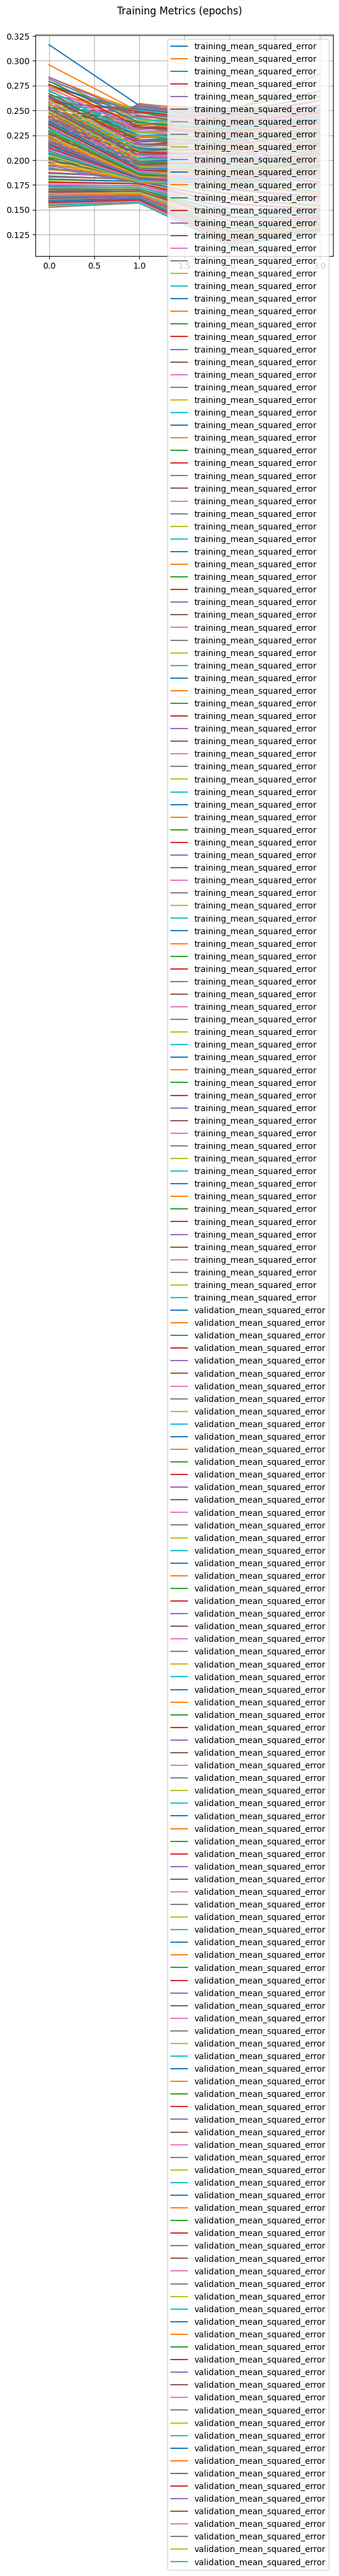

In [ ]:
if len(metrics) > 1:
    fig, ax = plt.subplots(1, len(metrics), figsize=(10, 5))
    plt.suptitle('Training Metrics (epochs)')
    for i in range(len(metrics)):
        multy_plot([stats['training_' + metrics[i].__name__], stats['validation_' + metrics[i].__name__]], 
                ['training_' + metrics[i].__name__, 'validation_' + metrics[i].__name__],
                ax=ax[i])
else:
    plt.suptitle('Training Metrics (epochs)')
    multy_plot([stats['training_' + metrics[0].__name__], stats['validation_' + metrics[0].__name__]], 
                ['training_' + metrics[0].__name__, 'validation_' + metrics[0].__name__])

In [ ]:

'''plt.suptitle('Training Metrics (epochs)')
for i in range(len(metrics)):
    multy_plot([stats_0['training_' + metrics[i].__name__], stats_0['validation_' + metrics[i].__name__]] + 
               [stats_1['training_' + metrics[i].__name__], stats_1['validation_' + metrics[i].__name__]] +
               [stats_2['training_' + metrics[i].__name__], stats_2['validation_' + metrics[i].__name__]] +
               [stats_3['training_' + metrics[i].__name__], stats_3['validation_' + metrics[i].__name__]],
            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], 
            title='Training Metrics (epochs)')'''

"plt.suptitle('Training Metrics (epochs)')\nfor i in range(len(metrics)):\n    multy_plot([stats_0['training_' + metrics[i].__name__], stats_0['validation_' + metrics[i].__name__]] + \n               [stats_1['training_' + metrics[i].__name__], stats_1['validation_' + metrics[i].__name__]] +\n               [stats_2['training_' + metrics[i].__name__], stats_2['validation_' + metrics[i].__name__]] +\n               [stats_3['training_' + metrics[i].__name__], stats_3['validation_' + metrics[i].__name__]],\n            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], \n            title='Training Metrics (epochs)')"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


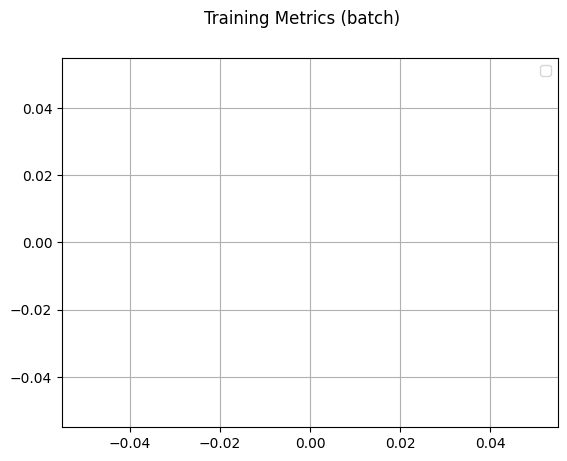

In [ ]:
if len(metrics) > 1:
    fig, ax = plt.subplots(1, len(metrics), figsize=(10, 5))
    plt.suptitle('Learning Curve (batch)')
    for i in range(len(metrics)):
        multy_plot([stats['training_batch_' + metrics[i].__name__], stats['validation_batch_' + metrics[i].__name__]], 
                ['training_batch_' + metrics[i].__name__, 'validation_batch_' + metrics[i].__name__],
                ax=ax[i])
    plt.show()
else:
    plt.suptitle('Training Metrics (batch)')
    multy_plot([stats['training_batch_' + metrics[0].__name__], stats['validation_batch_' + metrics[0].__name__]], 
                ['training_batch_' + metrics[0].__name__, 'validation_batch_' + metrics[0].__name__])

In [ ]:
'''plt.suptitle('Training Metrics (epochs)')
for i in range(len(metrics)):
    multy_plot([stats_0['training_batch_' + metrics[i].__name__], stats_0['validation_batch_' + metrics[i].__name__]] + 
               [stats_1['training_batch_' + metrics[i].__name__], stats_1['validation_batch_' + metrics[i].__name__]] +
               [stats_2['training_batch_' + metrics[i].__name__], stats_2['validation_batch_' + metrics[i].__name__]] +
               [stats_3['training_batch_' + metrics[i].__name__], stats_3['validation_batch_' + metrics[i].__name__]] + 
               [stats_4['training_batch_' + metrics[i].__name__], stats_4['validation_batch_' + metrics[i].__name__]],
            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], 
            title='Training Metrics (epochs)')'''

"plt.suptitle('Training Metrics (epochs)')\nfor i in range(len(metrics)):\n    multy_plot([stats_0['training_batch_' + metrics[i].__name__], stats_0['validation_batch_' + metrics[i].__name__]] + \n               [stats_1['training_batch_' + metrics[i].__name__], stats_1['validation_batch_' + metrics[i].__name__]] +\n               [stats_2['training_batch_' + metrics[i].__name__], stats_2['validation_batch_' + metrics[i].__name__]] +\n               [stats_3['training_batch_' + metrics[i].__name__], stats_3['validation_batch_' + metrics[i].__name__]] + \n               [stats_4['training_batch_' + metrics[i].__name__], stats_4['validation_batch_' + metrics[i].__name__]],\n            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], \n            title='Training Metrics (epochs)')"

In [ ]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

AttributeError: 'list' object has no attribute 'keys'

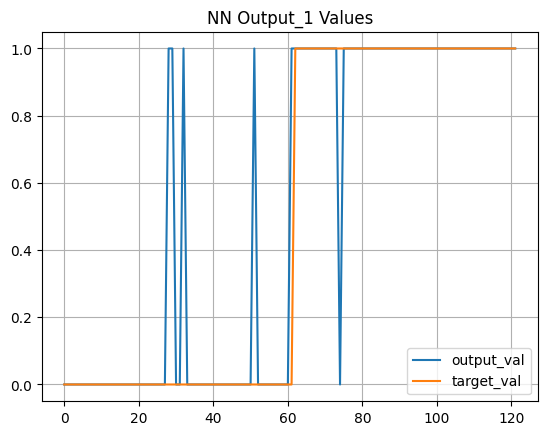

In [ ]:
for i in range(TR_OUTPUT):
    sorted_order = training_set[:, TR_INPUT + i].argsort()
    multy_plot([tr_df['prediction_1'].values[sorted_order] , tr_df['output_1'].values[sorted_order]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

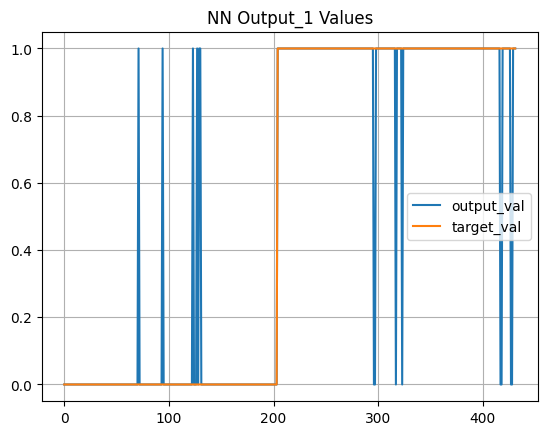

In [ ]:
for i in range(TR_OUTPUT):
    sorted_order = validation_set[:, TR_INPUT + i].argsort()
    multy_plot([val_df['prediction_1'].values[sorted_order] , val_df['output_1'].values[sorted_order]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')